# Лабораторна робота №1
з дисципліни "Проблеми багатозначного аналізу"

студента групи ОМ-2, 
Пишка Андрія

### Знаходження субдиференціалу

In [1]:
# Сторонні ресурси

import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff
import random

In [2]:
# Задаємо постанову задачі

x1, x2, a, b = symbols('x1 x2 a b', real=True)
f = abs(x1 + x2 - 4) + abs(x1 - 2 * x2 + 1)

def f(x1, x2):
    return abs(x1 + x2 - 4) + abs(x1 - 2 * x2 + 1)

# Функція U
uPos = x1 + x2 - 4
uNeg = -x1 - x2 + 4
uAlpha = a * (x1 + x2 - 4)

# Функція V
vPos = x1 - 2 * x2 + 1
vNeg = -x1 + 2 * x2 - 1
vBeta = b * (x1 - 2 * x2 + 1)

In [3]:
# Часткова похідна

def partialDerivative(f, variable, x: float, y: float) -> float:
    return float(diff(f, variable).subs({x1: x, x2: y}))

def partialDerivativeA(f, variable, x: float, y: float) -> float:
    return float(diff(f, variable).subs({x1: x, x2: y, a: random.uniform(-1, 1)}))

def partialDerivativeB(f, variable, x: float, y: float) -> float:
    return float(diff(f, variable).subs({x1: x, x2: y, b: random.uniform(-1, 1)}))

In [4]:
# Субдиференціал

def uSubderivative(x: float, y: float) -> list:
    if y > -x + 4: return [partialDerivative(uPos, x1, x, y), partialDerivative(uPos, x2, x, y)]
    if y < -x + 4: return [partialDerivative(uNeg, x1, x, y), partialDerivative(uNeg, x2, x, y)]
    else: return [partialDerivativeA(uAlpha, x1, x, y), partialDerivativeA(uAlpha, x2, x, y)]

def vSubderivative(x: float, y: float) -> list:
    if y < (x + 1) / 2: return [partialDerivative(vPos, x1, x, y), partialDerivative(vPos, x2, x, y)]
    if y > (x + 1) / 2: return [partialDerivative(vNeg, x1, x, y), partialDerivative(vNeg, x2, x, y)]
    else: return [partialDerivativeB(vBeta, x1, x, y), partialDerivativeB(vBeta, x2, x, y)]
    
def subderivative(x: float, y: float) -> list:
    return np.array(uSubderivative(x, y)) + np.array(vSubderivative(x, y))

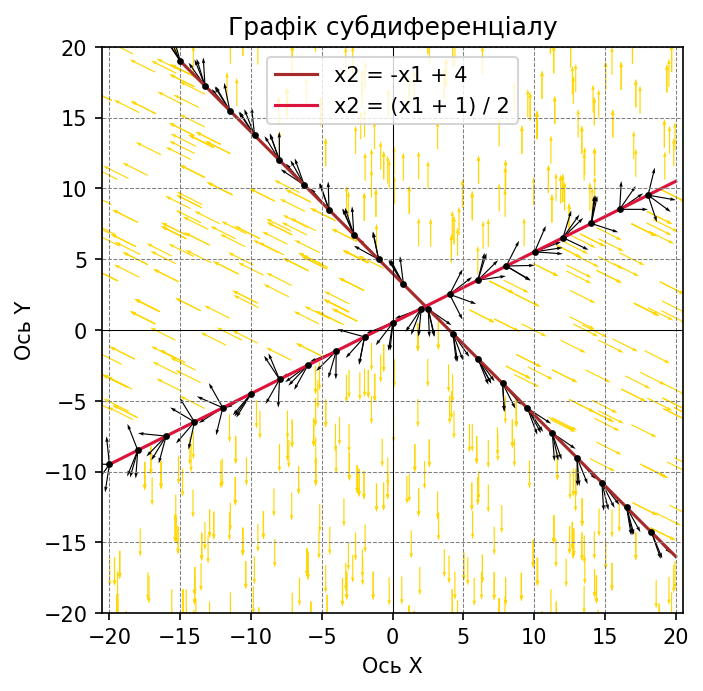

In [5]:
# Графік субдиференціалу

# Параметри
linePointsNumber = 20
vectorSize = 1.5

#%matplotlib inline
plt.figure(figsize=(5, 5), dpi=150)

# Перша лінія
x1Values = np.linspace(-15, 20, 800)
y1Values = - x1Values + 4

# Друга лінія
x2Values = np.linspace(-20, 20, 800)
y2Values = (x2Values + 1) / 2.0

# Вільний простір (обираємо випадковим чином)
xSample1 = np.random.uniform(-20, 0, 200)
xSample2 = np.random.uniform(0, 20, 200)
xSample = np.concatenate((xSample1, xSample2, xSample1, xSample2))
ySample1 = np.random.uniform(-20, 0, 200)
ySample2 = np.random.uniform(0, 20, 200)
ySample = np.concatenate((ySample1, ySample2, ySample2, ySample1))

# Будуємо графік ліній
plt.plot(x1Values, y1Values, color = 'brown', label='x2 = -x1 + 4', zorder = 1)
plt.plot(x2Values, y2Values, color = 'crimson', label='x2 = (x1 + 1) / 2', zorder = 1)

# Обираємо точки для відображення векторів
line1Points = np.column_stack((x1Values, y1Values)) # On 1st line
line2Points = np.column_stack((x2Values, y2Values)) # On 2nd line
freePoints = np.column_stack((xSample, ySample)) # Full random

# Рівномірно розподілені точки на лініях
step = len(x1Values) // linePointsNumber
indexes = np.arange(0, len(x1Values), step)
startPoints1 = [line1Points[i] for i in indexes]
startPoints2 = [line2Points[i] for i in indexes]

# Випадково розподілені точки на вільному просторі
xyRandom = np.random.randint(0, len(line1Points), 800)
freeStartPoints = [freePoints[i] for i in xyRandom]  # Стартові точки на вільній площині


vectorsComponents = [subderivative(xy[0], xy[1]) for xy in freeStartPoints]

def normalizeVector(vector):
    norm = np.linalg.norm(vector)
    if norm == 0: 
        return vector  # Вектор уже нулевой длины
    return vector / norm * 3

# Будуємо вільні вектори
for i in range(len(freeStartPoints)):
    end_point = (
        freeStartPoints[i][0] + vectorsComponents[i][0],
        freeStartPoints[i][1] + vectorsComponents[i][1]
        )
    normalized_vector = normalizeVector(vectorsComponents[i])
    # Plot the vector
    plt.quiver(*freeStartPoints[i], *normalized_vector, angles='xy', scale_units='xy', scale=vectorSize, color='gold', width = 0.002)

# Будуємо вектори на лініях
start_points = np.concatenate((startPoints1, startPoints2)) # Усі стартові точки
vectorsComponents = [subderivative(xy[0], xy[1]) for xy in start_points]
for i in range(len(start_points)):
    end_point = (
        start_points[i][0] + vectorsComponents[i][0],
        start_points[i][1] + vectorsComponents[i][1])
    normalized_vector = normalizeVector(vectorsComponents[i])
    # Plot the vector
    plt.quiver(*start_points[i], *normalized_vector, angles='xy', scale_units='xy', scale=vectorSize, color='black', width = 0.002)

vectorsComponents = [subderivative(xy[0], xy[1]) for xy in start_points]
for i in range(len(start_points)):
    end_point = (
        start_points[i][0] + vectorsComponents[i][0],
        start_points[i][1] + vectorsComponents[i][1])
    normalized_vector = normalizeVector(vectorsComponents[i])
    # Plot the vector
    plt.quiver(*start_points[i], *normalized_vector, angles='xy', scale_units='xy', scale=vectorSize, color='black', width = 0.002)
    
vectorsComponents = [subderivative(xy[0], xy[1]) for xy in start_points]
for i in range(len(start_points)):
    end_point = (
        start_points[i][0] + vectorsComponents[i][0],
        start_points[i][1] + vectorsComponents[i][1])
    normalized_vector = normalizeVector(vectorsComponents[i])
    # Plot the vector
    plt.quiver(*start_points[i], *normalized_vector, angles='xy', scale_units='xy', scale=vectorSize, color='black', width = 0.002)
    
vectorsComponents = [subderivative(xy[0], xy[1]) for xy in start_points]
for i in range(len(start_points)):
    end_point = (
        start_points[i][0] + vectorsComponents[i][0],
        start_points[i][1] + vectorsComponents[i][1])
    normalized_vector = normalizeVector(vectorsComponents[i])
    # Plot the vector
    plt.quiver(*start_points[i], *normalized_vector, angles='xy', scale_units='xy', scale=vectorSize, color='black', width = 0.002)
    # Побудувати стартові точки
    plt.scatter(*start_points[i], color='black', s = 5, zorder = 4)

# Customize the plot
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.axis('equal')
plt.xlim(-20, 20)  # Установите нужные значения для ограничения по оси X
plt.ylim(-20, 20)  # Установите нужные значения для ограничения по оси Y

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('Графік субдиференціалу')
plt.xlabel('Ось Х')
plt.ylabel('Ось Y')
plt.legend()

plt.show()

### Генетичний алгоритм

In [6]:
# Сторонні ресурси

# import math
# from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
# from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import time

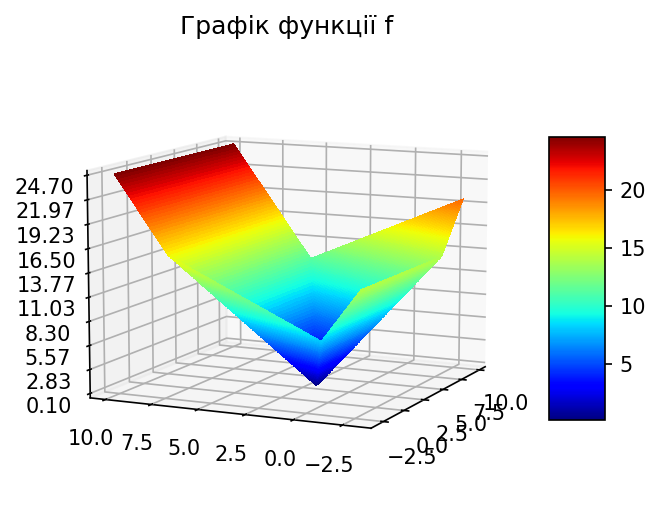

In [7]:
# Графік функції f

x = np.arange(-3.0,10.0,0.1)
y = np.arange(-3.0,10.0,0.1)
X, Y = np.meshgrid(x, y)

F = f(X, Y)

%matplotlib inline
fig = plt.figure(figsize=(5, 5), dpi=150)
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(X, Y, F, rstride=1, cstride=1, 
                      cmap='jet',linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(elev=10, azim=205)
ax.set_title('Графік функції f')

plt.show()

In [8]:
# Генеруємо покоління випадковим чином
def generatePopulation(populationSize, x1Range, x2Range):
    population = []
    for i in range(populationSize):
        individual = {
            "x1": random.uniform(x1Range[0], x1Range[1]),
            "x2": random.uniform(x2Range[0], x2Range[1]),}
        population.append(individual)
    return population

In [9]:
# Обчислюємо значення функції для даної точки (індивіда)
def f(individ):
    x1 = individ["x1"]
    x2 = individ["x2"]
    return abs(x1 + x2 - 4) + abs(x1 - 2 * x2 + 1)

In [10]:
# Обираємо переможця, для якого функція прийматиме найменше значення
def getWinner(population, populationSize, sampleSize):
    randomWinnersIndexes = np.random.randint(0, populationSize, sampleSize)
    bestWinner = population[randomWinnersIndexes[0]]
    functionValue = f(bestWinner)   
    for winnerIndex in randomWinnersIndexes:
        winnersResult = f(population[winnerIndex])
        if (winnersResult < functionValue):
            functionValue = winnersResult
            bestWinner = population[winnerIndex]
    return bestWinner

In [11]:
# 18+
def crossover(firstParent, secondParent):
    randomMultiplier = random.uniform(0, 1)
    x1_1 = firstParent["x1"]
    x2_1 = firstParent["x2"]
    x1_2 = secondParent["x1"]
    x2_2 = secondParent["x2"]
    return {
        "x1": (x1_1 * randomMultiplier + x1_2 * (1 - randomMultiplier)),
        "x2": (x2_1 * randomMultiplier + x2_2 * (1 - randomMultiplier))}

In [12]:
# Сортуємо індивідів популяції за значеннями функції f
def sortPopulationByFunc(population):
    return sorted(population, key=f)

In [13]:
# Випадкова мутація
def mutate(individ, x1Range, x2Range):
    nextX1 = individ["x1"] + random.uniform(-0.01, 0.01)
    nextX2 = individ["x2"] + random.uniform(-0.01, 0.01)

    # Залишаємось у заданих межах
    nextX1 = min(max(nextX1, x1Range[0]), x1Range[1])
    nextX2 = min(max(nextX2, x2Range[0]), x2Range[1])

    return {"x1": nextX1, "x2": nextX2}

In [14]:
# Генерація нового покоління
def nextGeneration(previousPopulation, populationSize, mutationProbability, x1Range, x2Range):
    nextGeneration = []
    for i in range(populationSize):
        
        # Схрещуємо батьків
        firstParent = getWinner(previousPopulation, populationSize, 20)
        secondParent = getWinner(previousPopulation, populationSize, 20)
        individ = crossover(firstParent, secondParent)

        # Мутація
        if (random.uniform(0, 1) < mutationProbability):
            individ = mutate(individ, x1Range, x2Range)

        nextGeneration.append(individ)
    return nextGeneration

In [15]:
# Задаємо початкові параметри

# Межі пошукового простору
d = 1
x1Range = [-10**d, 10**d]
x2Range = [-10**d, 10**d]

populationSize = 10**2  # Розмір популяції у кожному поколінні
generationsNumber = 100  # Кількість поколінь
mutationProbability = 0.2  # Імовірність мутації

In [16]:
# Робота алгоритму

startTime = time.time()
population = generatePopulation(populationSize, x1Range, x2Range)
bestResults = []

# bestResults.append(f(sortPopulationByFunc(population)[0]))
# population = nextGeneration(population, populationSize, mutationProbability, x1Range, x2Range)
# bestResults.append(f(sortPopulationByFunc(population)[0]))
# population = nextGeneration(population, populationSize, mutationProbability, x1Range, x2Range)
# while abs(bestResults[-1] - bestResults[-2]) > 10**(-10):
#     bestResults.append(f(sortPopulationByFunc(population)[0]))
#     population = nextGeneration(population, populationSize, mutationProbability, x1Range, x2Range)

for i in range(generationsNumber):
    bestResults.append(f(sortPopulationByFunc(population)[0]))
    population = nextGeneration(population, populationSize, mutationProbability, x1Range, x2Range)

bestIndivid = sortPopulationByFunc(population)[0]
bestResults.append(f(bestIndivid))


# Виводимо результати
# for i in range(len(bestResults)):
#     print(i, bestResults[i])
print('Найкращий результат : ', bestIndivid, f(bestIndivid))
print('Для робти програми знадобилося', time.time() - startTime, 'секунд.')

Найкращий результат :  {'x1': 2.333249963193902, 'x2': 1.6667500368060981} 0.0002501104182943692
Для робти програми знадобилося 0.4792215824127197 секунд.
